# Molecular Dynamics Simulation

#### Import packages

In [86]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
from MDAnalysis.analysis.distances import distance_array
import numpy as np
import pandas as pd

### Task 26: Load Universe

In [87]:
u = mda.Universe("md_run.tpr", "movie.xtc")
len(u.trajectory)

518

#### Selecting kinase and ligand

In [88]:
kinase = u.select_atoms('protein')
ligand = u.select_atoms("resname LIG")

In [89]:
print(f"Number of atoms in Protein: {len(kinase)}\tNumber of atoms in Ligand: {len(ligand)}")

Number of atoms in Protein: 5217	Number of atoms in Ligand: 47


### Task 27: Calculating Radius of Gyration

In [90]:
time = []
radgyr = []
for t in u.trajectory:
    radius = kinase.radius_of_gyration()
    time.append(t.time)
    radgyr.append(radius)

#### Plot the radius of gyration as a function of time

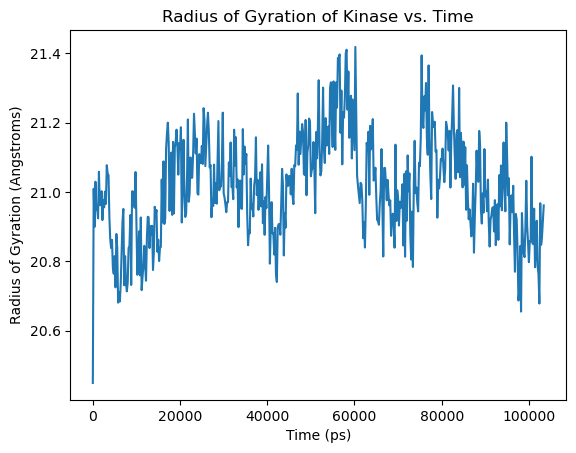

In [91]:
plt.plot(time, radgyr, linestyle='-')
plt.xlabel('Time (ps)')
plt.ylabel('Radius of Gyration (Angstroms)')
plt.title('Radius of Gyration of Kinase vs. Time')
plt.show()

### Task 28: Protein Contact

#### Calculate distance between kinase and ligand

In [92]:
distances = distance_array(kinase.positions, ligand.positions)
min_distance = np.min(distances)
max_distance = np.max(distances)
avg_distance = np.mean(distances)

df = pd.DataFrame({
    "Metric": ["Minimum distance", "Maximum distance", "Average distance"],
    "Distance (Angstroms)": [min_distance, max_distance, avg_distance]
})

df

,Metric,Distance (Angstroms)
0,Minimum distance,2.012464
1,Maximum distance,47.730575
2,Average distance,22.392107


#### Calculate contacts for last 10 residues

In [97]:
frames_k = []
frames_l = []
for ts in u.trajectory[-10:]:
    frame_k = kinase.center_of_mass(wrap=False, unwrap=False, compound='residues')
    frame_l = ligand.center_of_mass(wrap=False, unwrap=False, compound='residues')
    frames_k.append(frame_k)
    frames_l.append(frame_l)

frames_k = np.array(frames_k)
frames_l = np.array(frames_l)

In [98]:
frames_k

array([[[28.60786356, 23.78480523, 63.51781239],
        [29.8822528 , 20.80121906, 67.01672733],
        [33.05596038, 19.4854163 , 63.69044382],
        ...,
        [36.74510687, 35.92161329, 62.14960447],
        [37.87725849, 31.67292082, 59.77827259],
        [37.67553546, 28.93386329, 62.82510898]],

       [[33.39499044, 22.13443232, 67.59104211],
        [35.63814424, 18.34227401, 67.74252971],
        [36.49893039, 18.73161221, 63.141606  ],
        ...,
        [36.9709149 , 31.51795053, 62.69589398],
        [37.30252355, 29.22879419, 58.9768316 ],
        [38.84334722, 26.05407616, 61.45378053]],

       [[32.15877528, 19.5030608 , 58.30603115],
        [35.87996537, 16.43819683, 58.27174788],
        [34.70840811, 15.85981151, 53.8525785 ],
        ...,
        [38.31871964, 30.35513226, 61.9929172 ],
        [38.18842795, 28.6658739 , 57.09471686],
        [40.61897465, 25.43671376, 57.19910755]],

       ...,

       [[34.37393177, 21.39036027, 61.2427786 ],
        [36

In [99]:
frames_l

array([[[30.41045811, 34.04566554, 37.47234987]],

       [[31.44197157, 33.89981406, 36.98293079]],

       [[32.20648603, 38.08655874, 38.77128105]],

       [[31.42622613, 37.24670059, 37.73156906]],

       [[32.09552593, 36.87431575, 38.47573473]],

       [[30.66932672, 36.55479852, 38.03527592]],

       [[33.23513478, 33.62013779, 39.14715081]],

       [[30.58997821, 33.84160781, 37.83459833]],

       [[30.23127177, 30.79386489, 38.45848322]],

       [[29.99441649, 34.03337626, 36.91571235]]])